In [15]:
from PIL import Image
from pylab import *

im = Image.open('uw.png')

# turn it into array and crop
im_m = array(im)[50:299, :, :-1] # remove alpha channel
im_c = Image.fromarray(im_m)

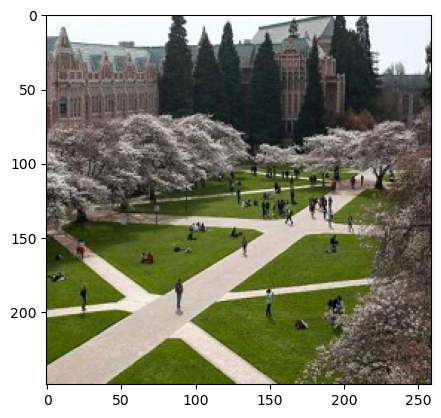

In [16]:
imshow(im_c)

## Filter 

In [13]:
# use conv filter
from PIL import ImageFilter
import numpy as np

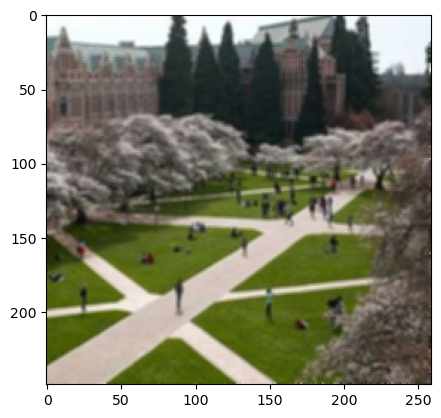

In [17]:
# define the filter (kernel)
blur = ImageFilter.Kernel((3,3), np.ones(9), 9, 0)
im_b = im_c.filter(blur)
imshow(im_b)

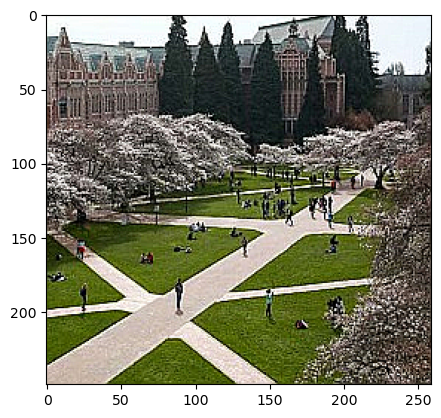

In [31]:
sharp = ImageFilter.Kernel((3,3), (-1,-1,-1,-1, 12, -1,-1,-1,-1), 4, 0) # brightness = 4
im_s = im_c.filter(sharp)
imshow(im_s)

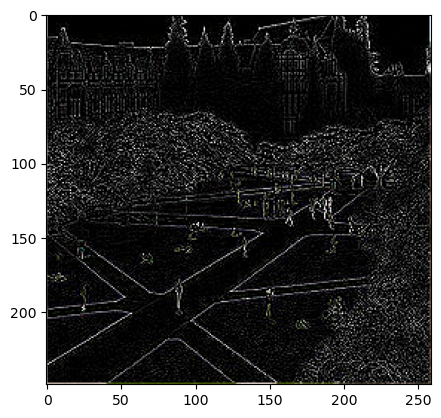

In [28]:
# find the edges of objects
# sum of the filter:(0,1,0,1,-4,1,0,1,0) is zero, so if an area consists of all the same color,
#  after la place, its sum of after conv becomes zero, which is the black. 
laplace = ImageFilter.Kernel((3,3), (0,1,0,1,-4,1,0,1,0), 1, 0) # brightness = 1
im_l = im_c.filter(laplace)
imshow(im_l)

## Pooling 

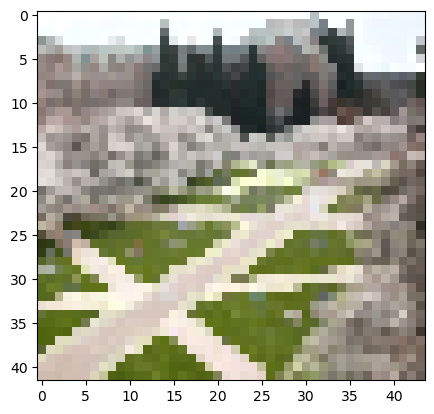

In [34]:
from skimage.measure import block_reduce

im_max_pool = block_reduce(im_m, block_size = (6,6,1), func = np.max)
imshow(im_max_pool)